#Introduction

#● CustomerID: Unique identifier for each customer.
● Gender: Male, Female.

● SeniorCitizen: Whether the customer is a senior citizen (1) or not (0).

● Partner: Whether the customer has a partner (Yes/No).

● Dependents: Whether the customer has dependents (Yes/No).

● Tenure: Number of months the customer has been with the company.

● PhoneService: Whether the customer has a phone service (Yes/No).

● MultipleLines: Whether the customer has multiple phone lines (Yes/No).

● InternetService: Type of internet service: DSL, Fiber optic, No.

● OnlineSecurity: Whether the customer has online security service (Yes/No).

● OnlineBackup: Whether the customer has online backup service (Yes/No).

● DeviceProtection: Whether the customer has device protection (Yes/No).

● TechSupport: Whether the customer has tech support (Yes/No).

● StreamingTV: Whether the customer has streaming TV service (Yes/No).

● StreamingMovies: Whether the customer has streaming movies service (Yes/No).

● Contract: Type of customer contract (Month-to-month, One year, Two year).

● PaperlessBilling: Whether the customer uses paperless billing (Yes/No).

● PaymentMethod: Payment method (Electronic check, Mailed check, Bank transfer,
  Credit card).

● MonthlyCharges: The amount charged to the customer monthly.

● TotalCharges: The total amount charged to the customer.

● Churn: Whether the customer churned (Yes/No).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data= pd.read_csv('Telco_Customer_Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Data Preprocessing

In [ ]:
data.shape

(7043, 21)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data['TotalCharges']= pd.to_numeric(data['TotalCharges'],errors = 'coerce')

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
numerical_features=data.select_dtypes(include=np.number).columns
categorical_features=data.select_dtypes(include='object').columns

print(len(numerical_features), numerical_features)
print(len(categorical_features), categorical_features)

4 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
17 Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [ ]:
for col in categorical_features:
    print(data[col].value_counts(normalize=True) * 100)
    print("====================================")

customerID
7590-VHVEG    0.014198
3791-LGQCY    0.014198
6008-NAIXK    0.014198
5956-YHHRX    0.014198
5365-LLFYV    0.014198
                ...   
9796-MVYXX    0.014198
2637-FKFSY    0.014198
1552-AAGRX    0.014198
4304-TSPVK    0.014198
3186-AJIEK    0.014198
Name: proportion, Length: 7043, dtype: float64
gender
Male      50.47565
Female    49.52435
Name: proportion, dtype: float64
Partner
No     51.69672
Yes    48.30328
Name: proportion, dtype: float64
Dependents
No     70.041176
Yes    29.958824
Name: proportion, dtype: float64
PhoneService
Yes    90.316626
No      9.683374
Name: proportion, dtype: float64
MultipleLines
No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: proportion, dtype: float64
InternetService
Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: proportion, dtype: float64
OnlineSecurity
No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name:

In [ ]:
data.dropna(inplace = True)

#Univarient Analysis

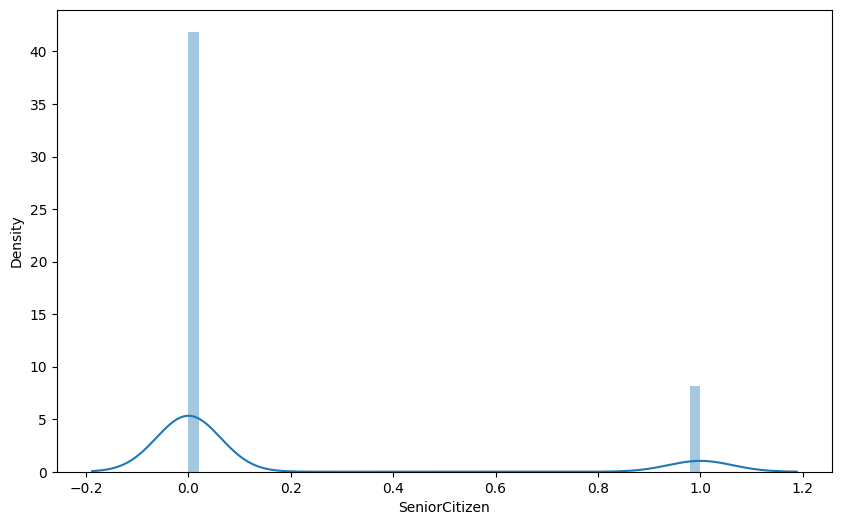

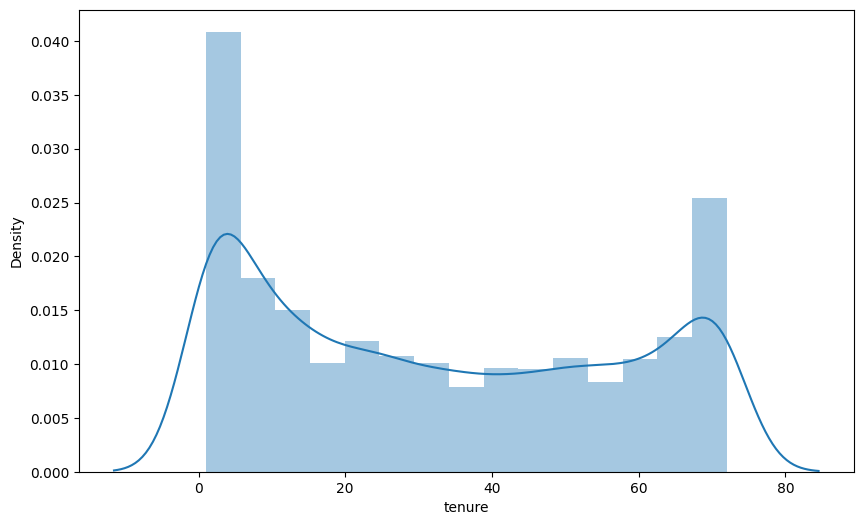

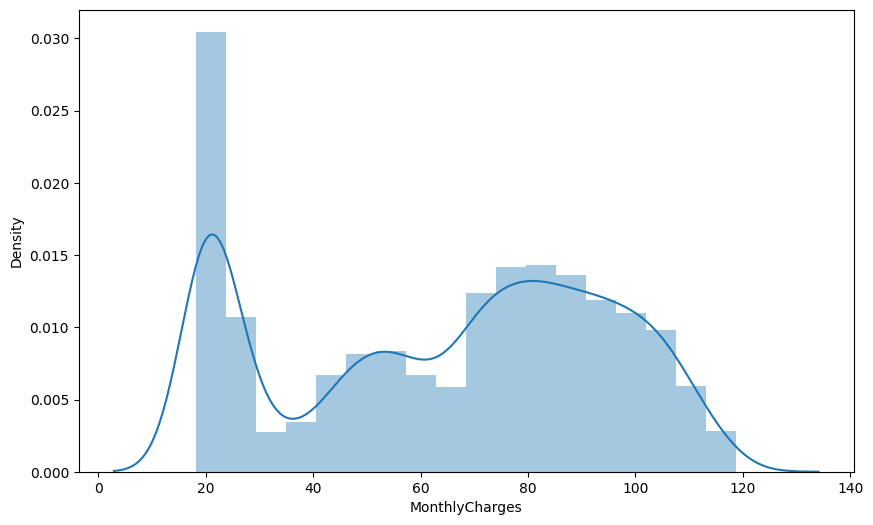

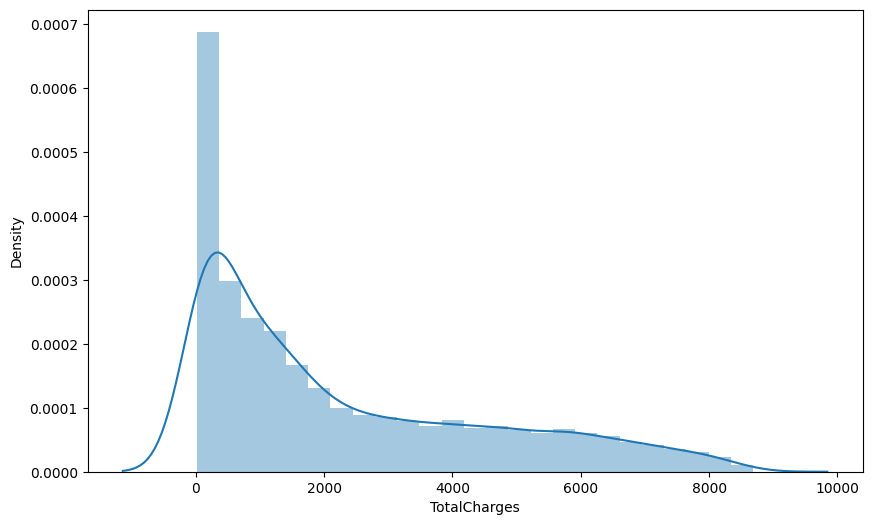

In [ ]:
for col in numerical_features:
    plt.figure(figsize=(10,6))
    sns.distplot(data[col])
    plt.show()

In [ ]:
data[numerical_features].skew()

,0
SeniorCitizen,1.831103
tenure,0.237731
MonthlyCharges,-0.222103
TotalCharges,0.961642


#Multivarient Analysis

In [ ]:
data.drop('customerID',axis=1,inplace=True)

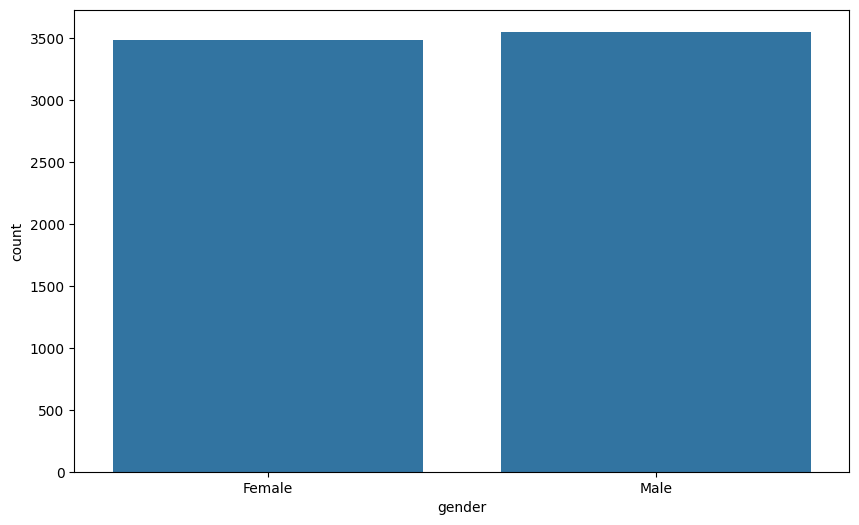

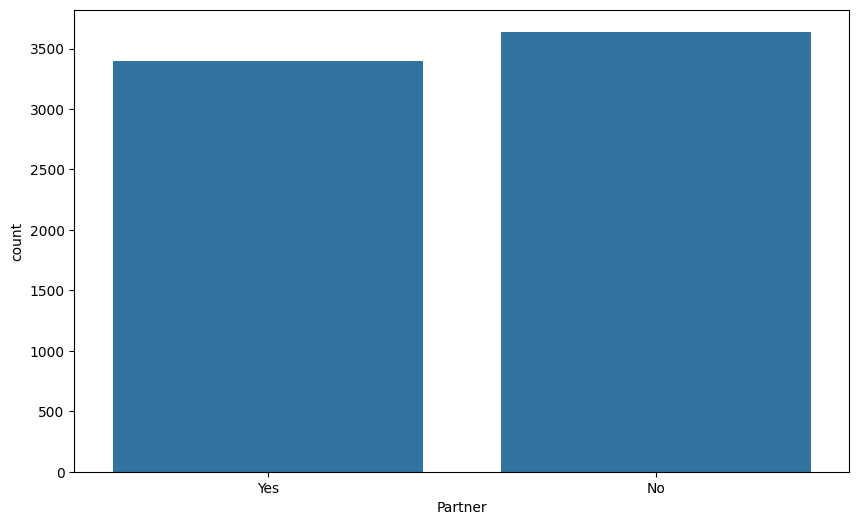

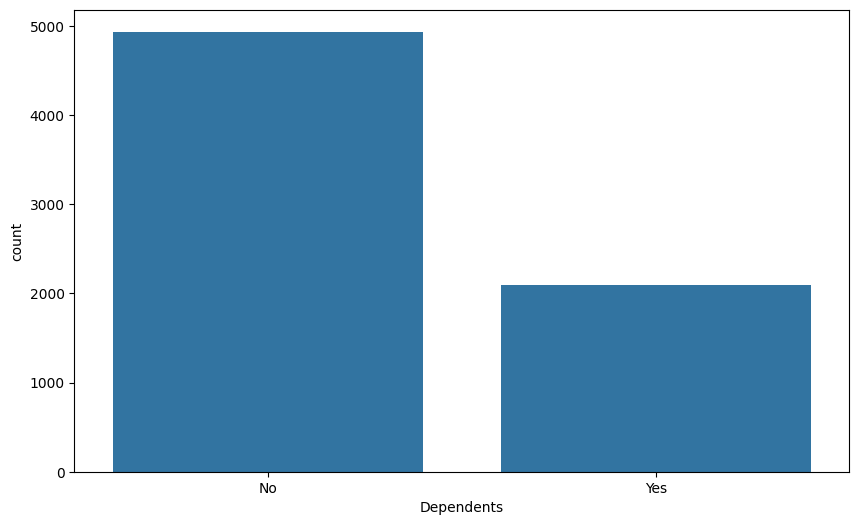

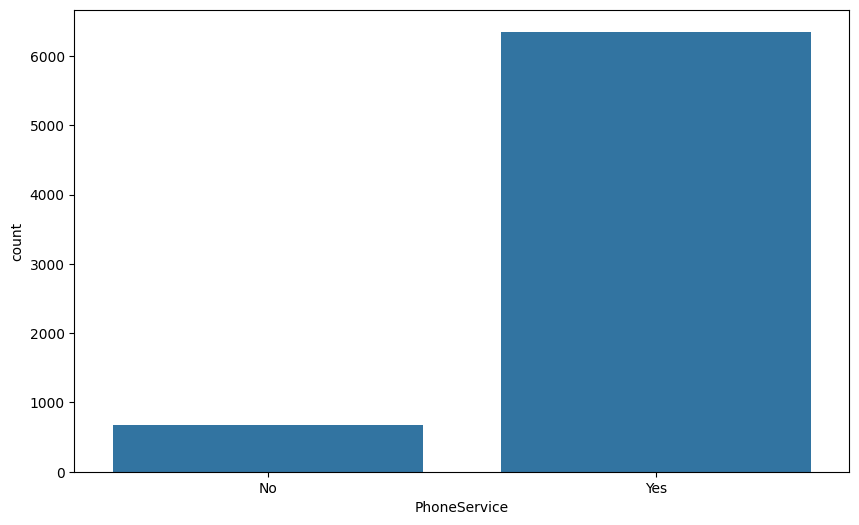

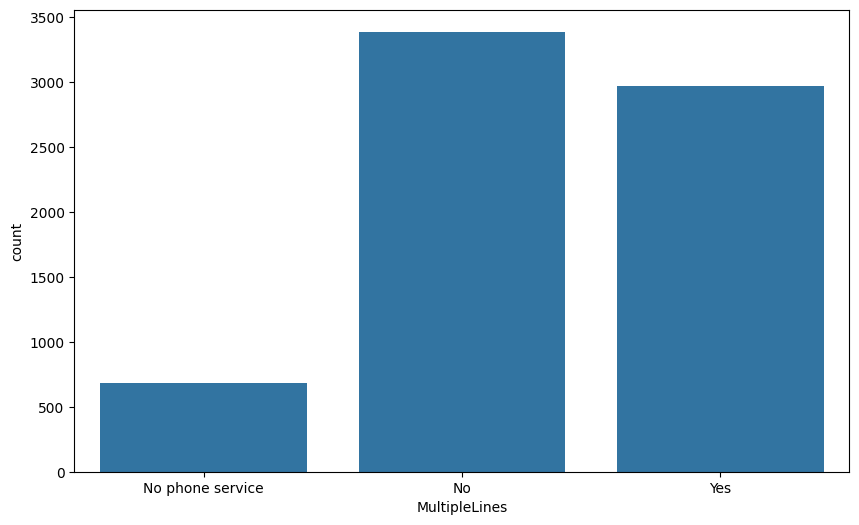

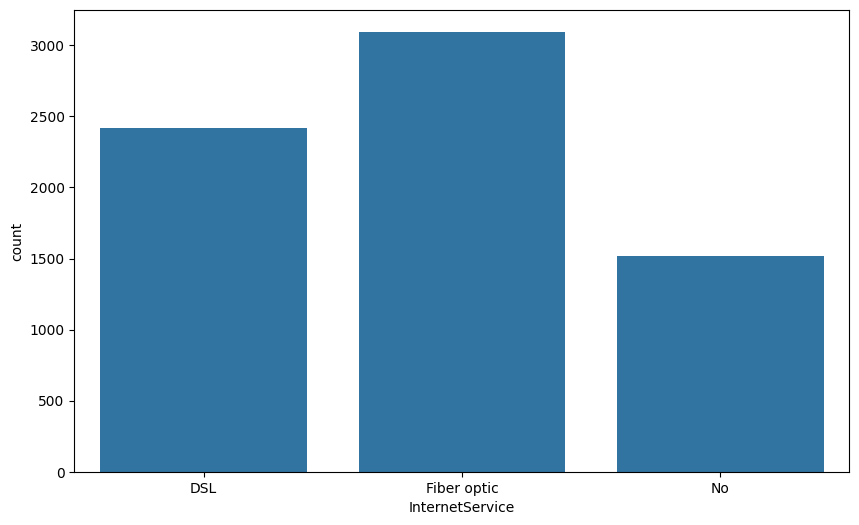

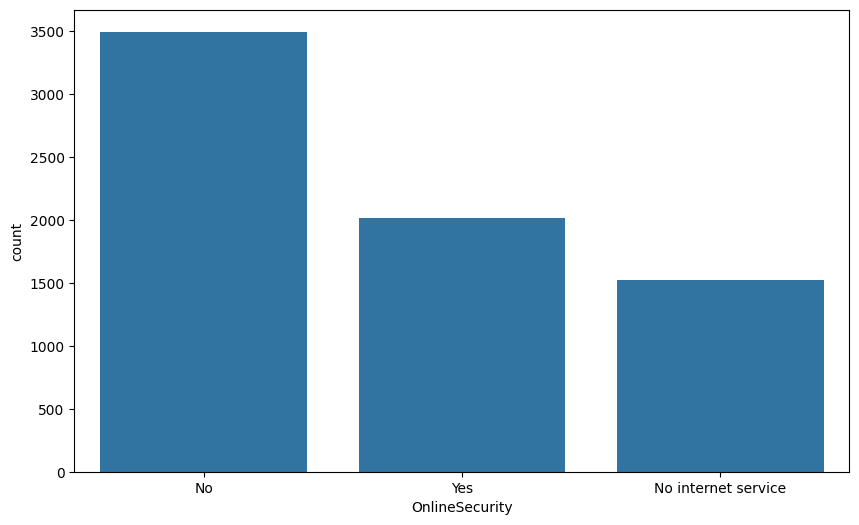

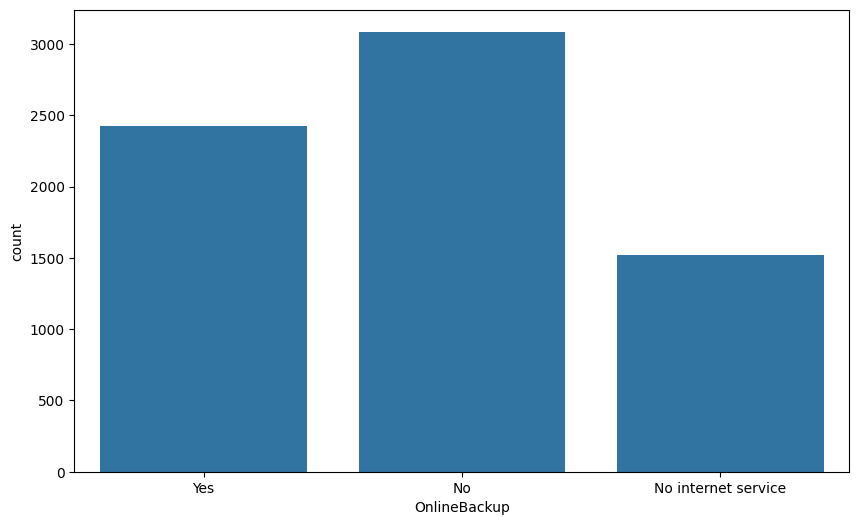

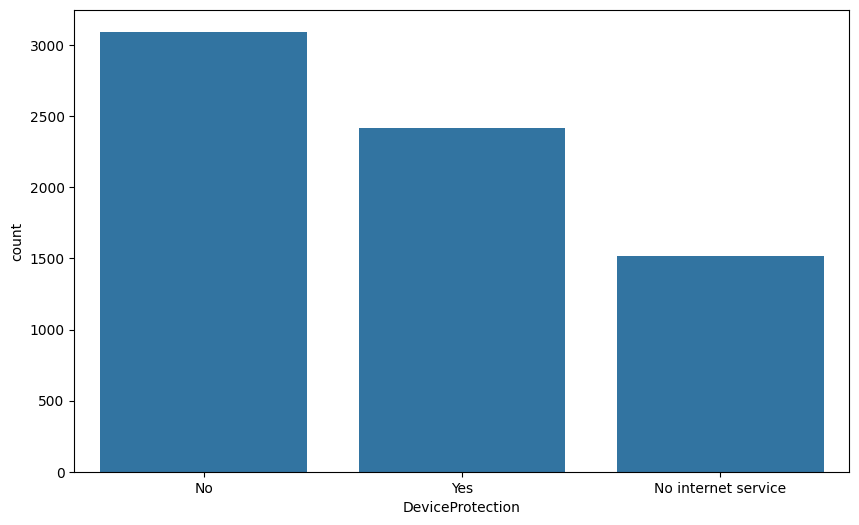

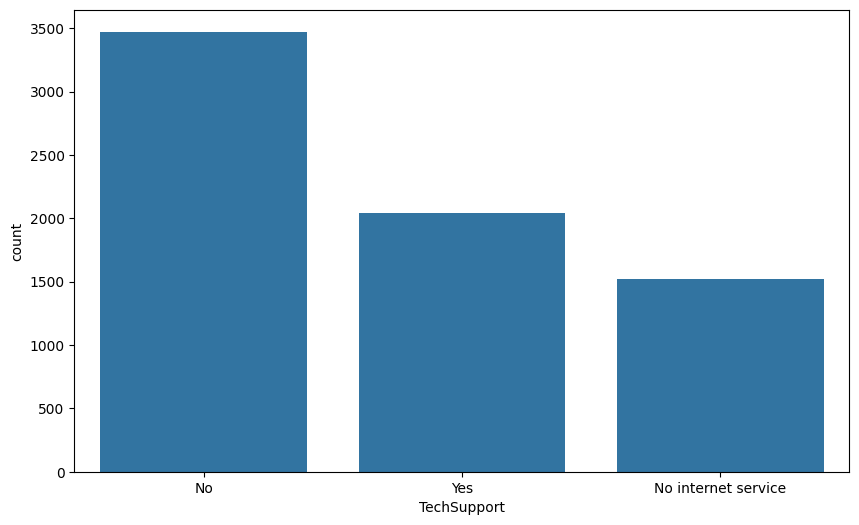

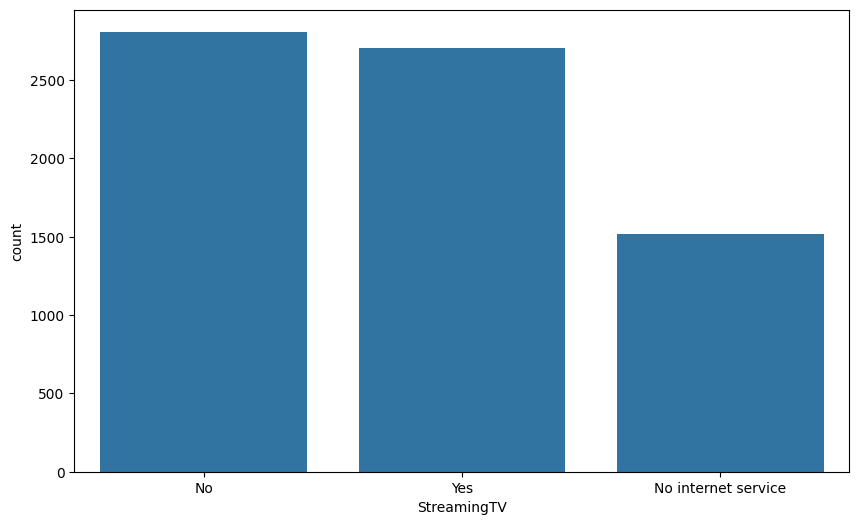

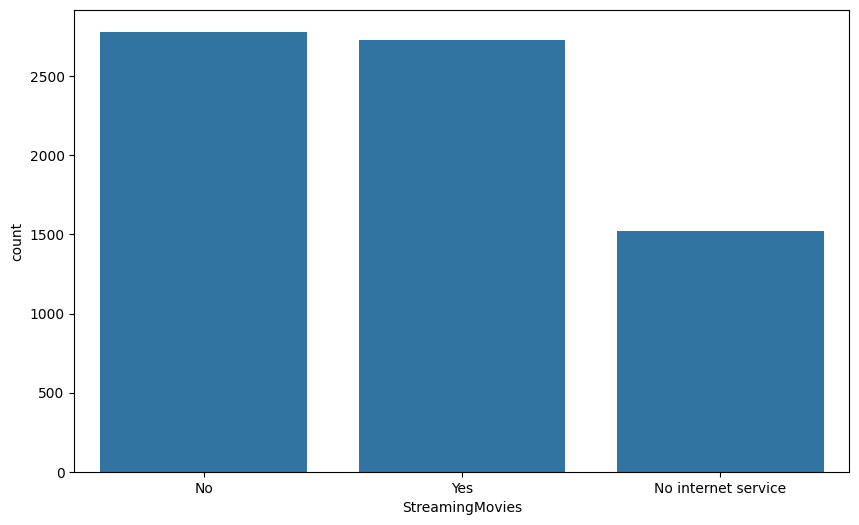

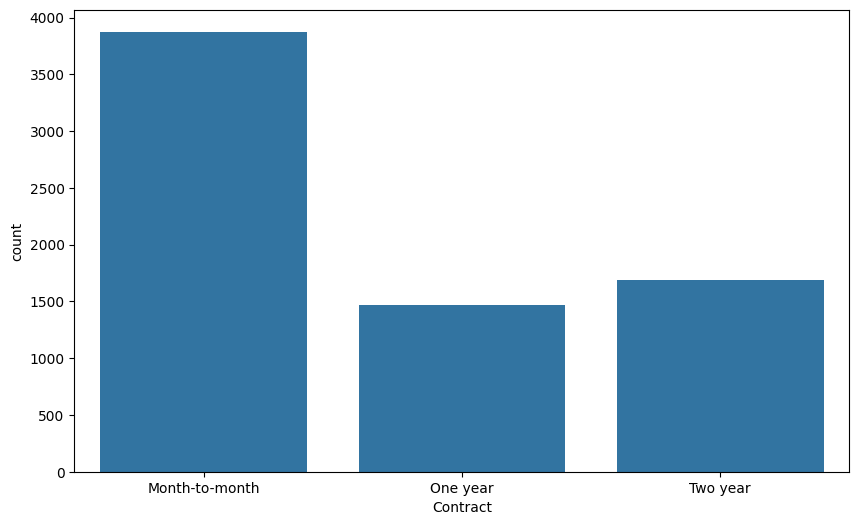

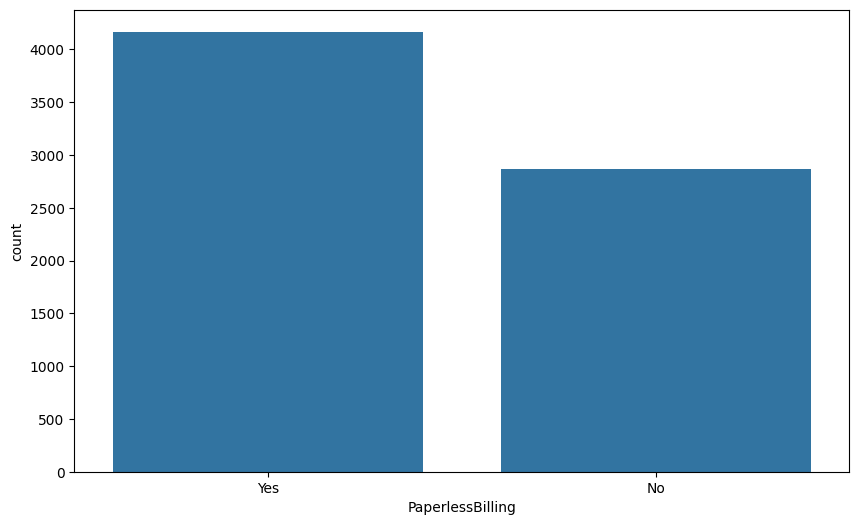

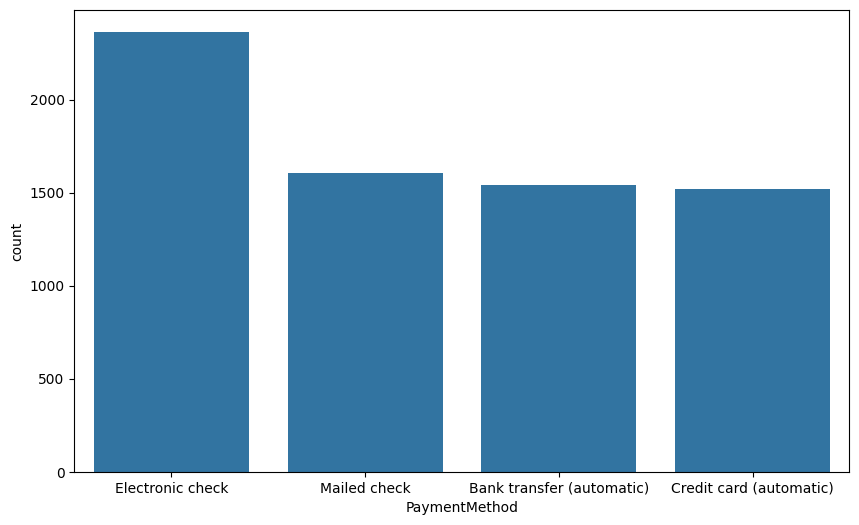

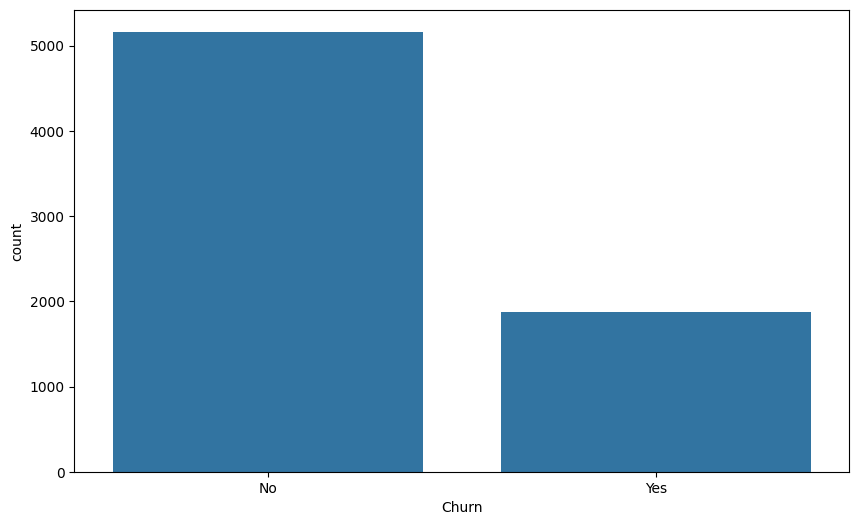

In [ ]:

for col in data.select_dtypes(include='object').columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=data,x=col)
    plt.show()

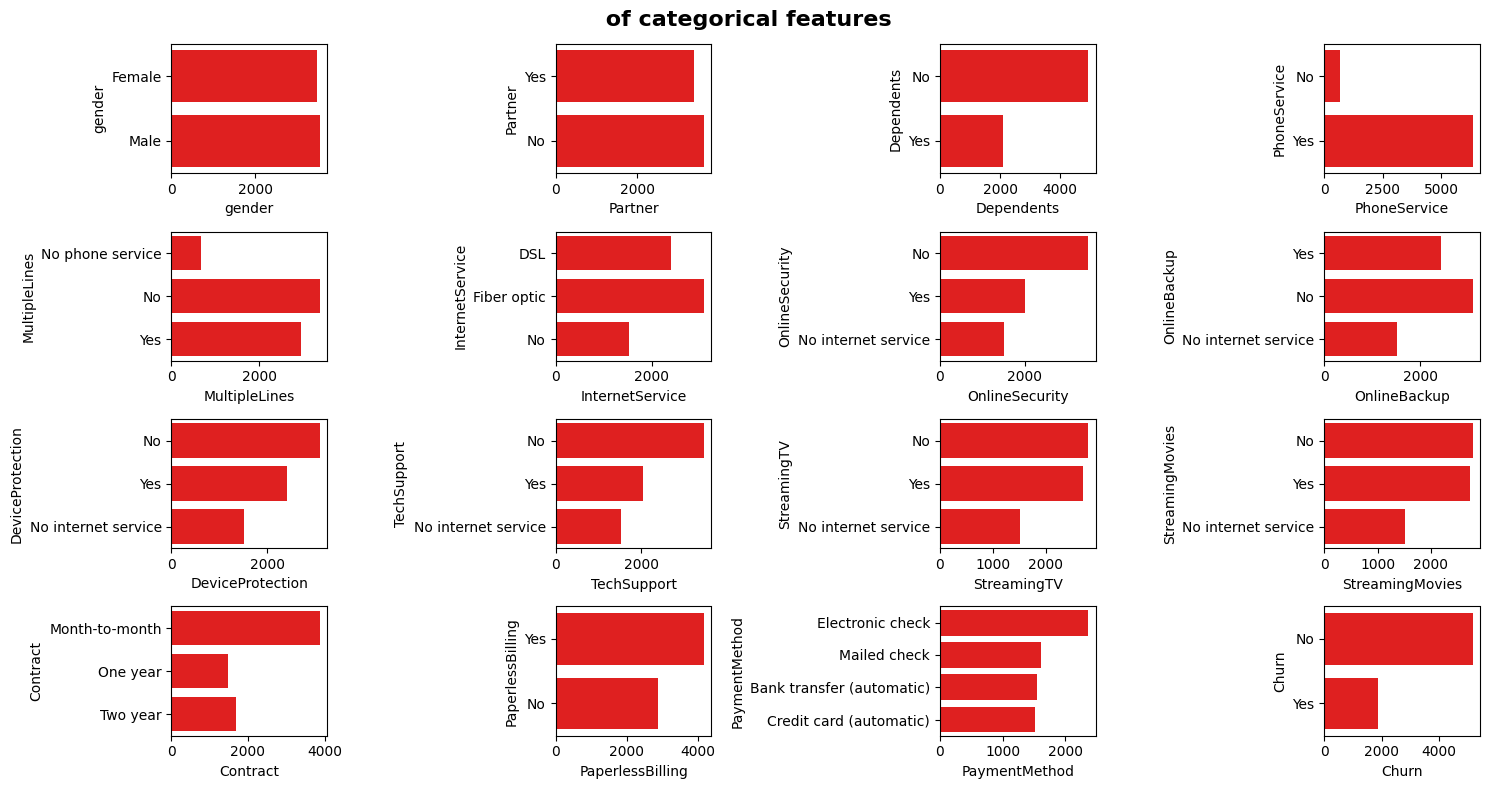

In [ ]:



categorical_features = data.select_dtypes(include='object').columns

plt.figure(figsize=(15, 8))
plt.suptitle("Multivarient Analysis of categorical features", fontsize=16, fontweight="bold")

for i in range(0, len(categorical_features)):
    plt.subplot(4, 4, i+1)
    sns.countplot(data[categorical_features[i]], color = "red")
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

In [ ]:
categorical_features

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [ ]:
numerical_features

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

#This code creates a scatter plot to visualize the relationship between two numerical variables, tenure and MonthlyCharges

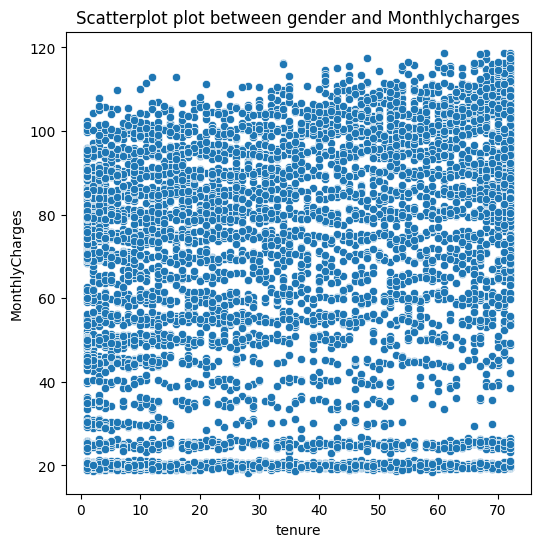

In [ ]:
plt.figure(figsize = (6, 6))
plt.title('Scatterplot plot between gender and Monthlycharges')
sns.scatterplot(data = data , x = 'tenure' , y = 'MonthlyCharges')
plt.show()

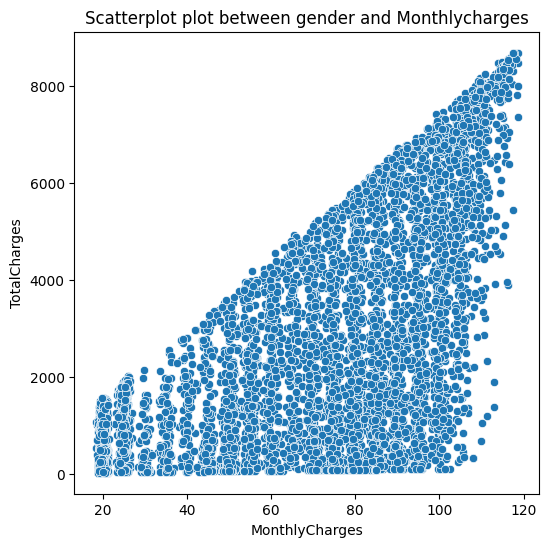

In [ ]:
plt.figure(figsize = (6, 6))
plt.title('Scatterplot plot between gender and Monthlycharges')
sns.scatterplot(data = data , x = 'MonthlyCharges' , y = 'TotalCharges')
plt.show()

#Chi-Square Test of Independence for each categorical feature

In [ ]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(data['Churn'], data[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,gender,Fail to Reject Null Hypothesis
1,Partner,Reject Null Hypothesis
2,Dependents,Reject Null Hypothesis
3,PhoneService,Fail to Reject Null Hypothesis
4,MultipleLines,Reject Null Hypothesis
5,InternetService,Reject Null Hypothesis
6,OnlineSecurity,Reject Null Hypothesis
7,OnlineBackup,Reject Null Hypothesis
8,DeviceProtection,Reject Null Hypothesis
9,TechSupport,Reject Null Hypothesis


#Box Plot

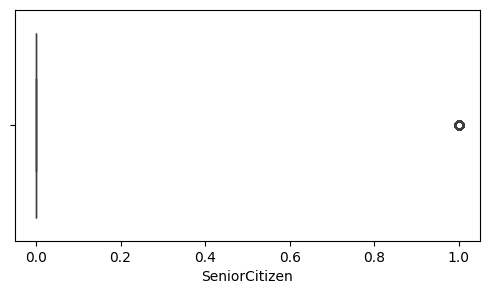

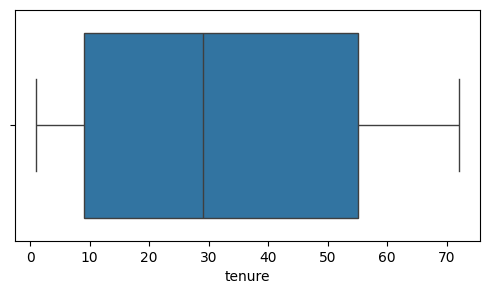

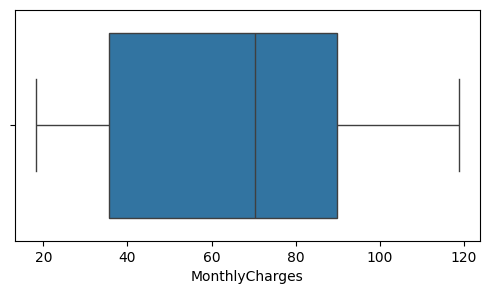

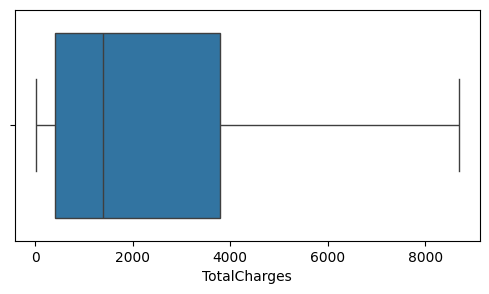

In [ ]:
for col in numerical_features:
    plt.figure(figsize=(6,3))
    sns.boxplot(data=data,x=col)
    plt.show()
    print('\n')

#This code visualizes the proportion of churned and non-churned customers for each Contract type using a bar plot with annotations

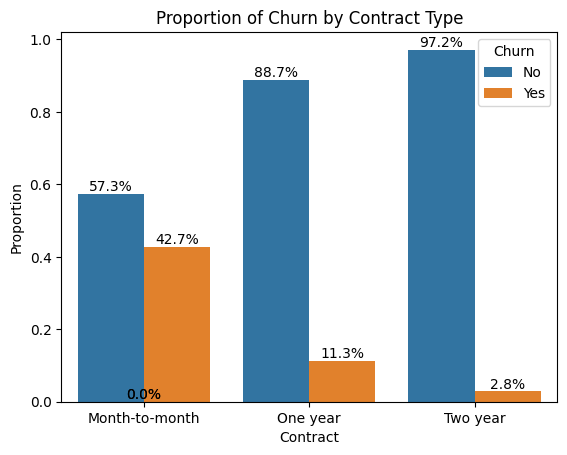

In [ ]:
grouped_data = data.groupby(['Contract', 'Churn']).size().reset_index(name='counts')


grouped_data['proportion'] = grouped_data.groupby('Contract')['counts'].transform(lambda x: x / x.sum())

ax = sns.barplot(x='Contract', y='proportion', hue='Churn', data=grouped_data)
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.ylabel('Proportion')
plt.title('Proportion of Churn by Contract Type')
plt.show()

#Proportion of churned and non-churned customers within the SeniorCitizen categories using a bar plot with annotations

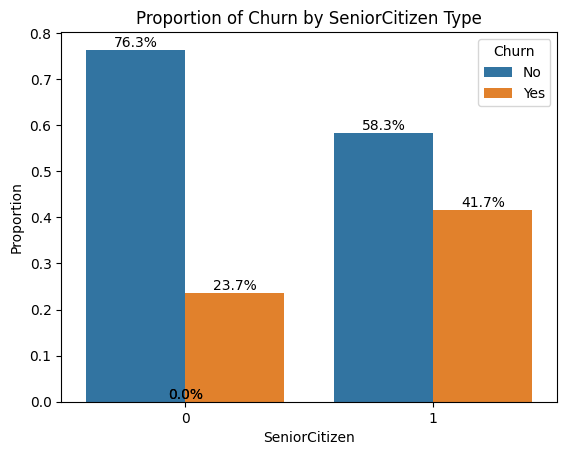

In [ ]:


grouped_data = data.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='counts')


grouped_data['proportion'] = grouped_data.groupby('SeniorCitizen')['counts'].transform(lambda x: x / x.sum())

ax = sns.barplot(x='SeniorCitizen', y='proportion', hue='Churn', data=grouped_data)
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.ylabel('Proportion')
plt.title('Proportion of Churn by SeniorCitizen Type')
plt.show()


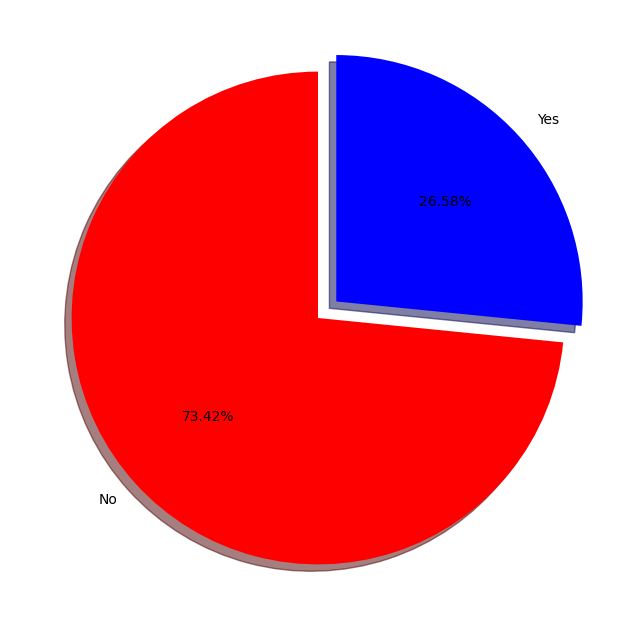

In [ ]:
prest = data.Churn.value_counts() * 100
label = ["No", "Yes"]

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)

explode = (0, 0.1)
colors = ["red", "blue"]
ax.pie(prest, labels=label, startangle=90, autopct="%1.2f%%", explode=explode, shadow=True, colors=colors)

plt.show()

Text(0.5, 1.0, 'Churn by Total Charges')

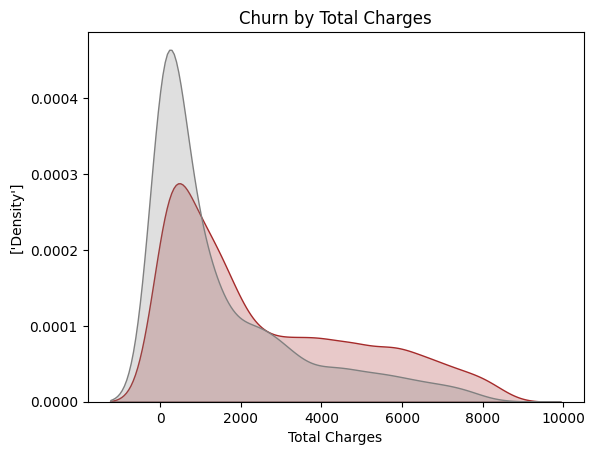

In [ ]:
sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No')], color="Brown", shade = True)
sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes')], color="grey", shade = True)
plt.xlabel('Total Charges')
plt.ylabel(['Density'])
plt.title('Churn by Total Charges')

#Visual representation of the relationships (correlations) between numerical features in a dataset


<Axes: >

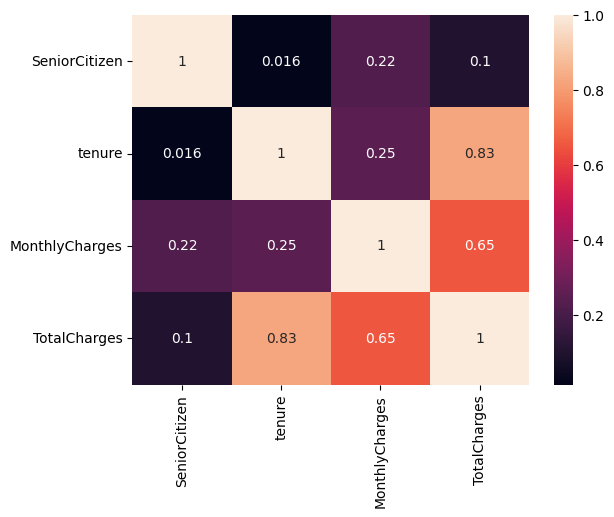

In [ ]:
num = data.select_dtypes(include='number')
sns.heatmap(data= num.corr(), annot=True)